# Regularization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from data import read_logistic_data_sets
from nn import Logistic
from tools import train


def experiment(lam, regularization,
               initial_rate, T,
               epoch_min, epoch_max, early_stopping):
    
    # Annealing
    def rate(t):
        return initial_rate / (1 + t / T)
    
    # Train
    dss = read_logistic_data_sets(2, 3)
    print('Training set size:', dss.train.size)
    print('Hold-out set size:', dss.validation.size)
    print('Test set size:', dss.test.size)
    results = train(Logistic, dss, rate=rate,
                    lam=lam, regularization=regularization,
                    epoch_min=epoch_min, epoch_max=epoch_max,
                    early_stopping=early_stopping)
    
#     # Plot
#     # label = '{}{}'.format(class_1, class_2)
    
#     results.plot_loss_function()
#     # plt.savefig('figs/logistic_{}_E.pdf'.format(label))
#     plt.ylim(0, 3)
#     # plt.savefig('figs/logistic_{}_E_zoom.pdf'.format(label))
#     plt.plot()
    
#     results.plot_percent_correct()
#     # plt.savefig('figs/logistic_{}_c.pdf'.format(label))
#     plt.ylim(0.9, 1)
#     # plt.savefig('figs/logistic_{}_c_zoom.pdf'.format(label))
#     plt.plot()
    
    return results

In [2]:
%%time
lams = [0.01, 0.001, 0.0001]
r = {}
for L in ['L1', 'L2']:
    for lam in [0.01, 0.001, 0.0001]:
        r[(lam, L)] = experiment(
            lam=lam, regularization=L,
            initial_rate=1e-3, T=42,
            epoch_min=500, epoch_max=1000, early_stopping=3
        )

Training set size: 3582
Hold-out set size: 423
Test set size: 426


/Users/qobilidop/Dropbox/CSE-253-PA/1/nn.py:44: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Training set size: 3582
Hold-out set size: 423
Test set size: 426
Training set size: 3582
Hold-out set size: 423
Test set size: 426
Training set size: 3582
Hold-out set size: 423
Test set size: 426
Training set size: 3582
Hold-out set size: 423
Test set size: 426
Training set size: 3582
Hold-out set size: 423
Test set size: 426
CPU times: user 11min 40s, sys: 2min 59s, total: 14min 39s
Wall time: 8min 57s


## Percent Correct

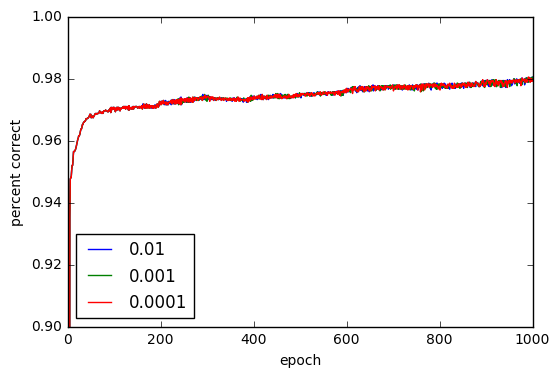

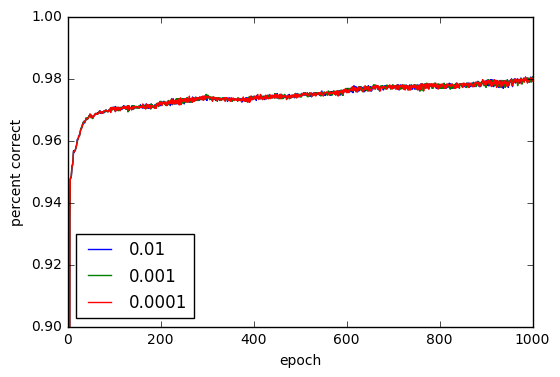

In [6]:
for L in ['L1', 'L2']:
    plt.figure()
    for lam in lams:
        plt.plot(r[(lam, L)].records['c_train'], label=lam)
    plt.legend(loc=0)    
    plt.xlabel('epoch')
    plt.ylabel('percent correct')
    plt.plot()
    plt.ylim(0.9, 1)

## Weight Vector Length

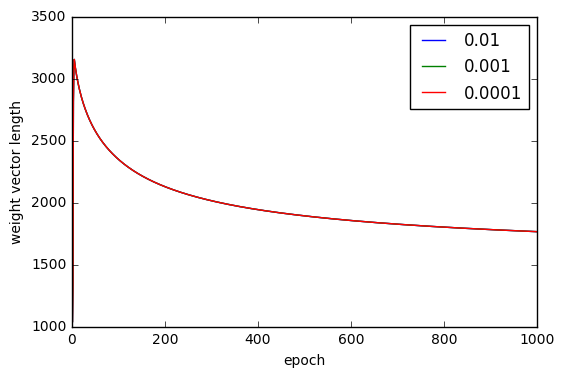

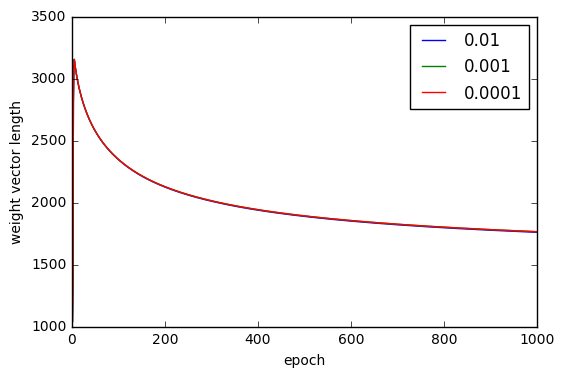

In [4]:
for L in ['L1', 'L2']:
    plt.figure()
    for lam in lams:
        weights = r[(lam, L)].records['weights']
        length = [np.linalg.norm(weight) for weight in weights]
        plt.plot(length, label=lam)
    plt.legend(loc=0)    
    plt.xlabel('epoch')
    plt.ylabel('weight vector length')
    plt.plot()

## Final Test Set Error

[0.71347727878753098, 0.71347727878753098, 0.71347727878753098]
[0.71347727878753098, 0.71347727878753098, 0.71347727878753098]


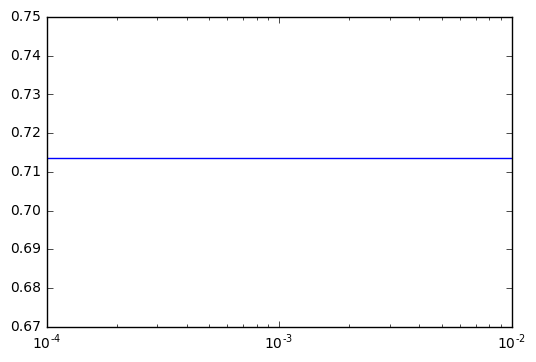

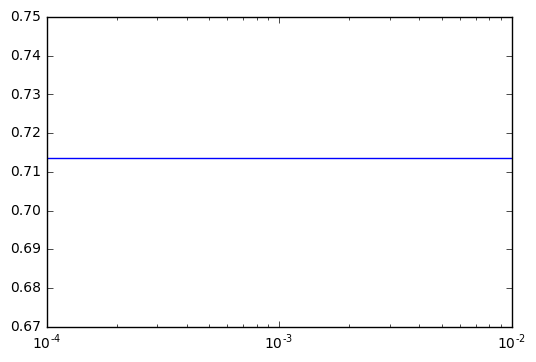

In [5]:
for L in ['L1', 'L2']:
    plt.figure()
    final_test_set_error = []
    for lam in lams:
        test_set_error = r[(lam, L)].records['E_test']
        final_test_set_error += [
            test_set_error[r[(lam, L)].epoch_final]
        ]
    print(final_test_set_error)
    plt.semilogx(lams, final_test_set_error)